# Proyecto 1 - Explorando los Algoritmos de Aprendizaje Supervisado
## Juan Ignacio Navarro
## Jose David Sánchez
## Steven Badilla

### Implementación de los algoritmos de aprendizaje supervisado
* Regresión Logística

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

class OurLogisticRegression:
    """ Logistic Regression model using numpy"""

    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True):
        """
        Model constructor
        Inputs:
        lr -> learning rate
        num_iter -> number of iterations in model
        """
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def get_params(self, deep=True):
        """
        Get the model hyperparameters
        """
        return {"lr": self.lr, "num_iter": self.num_iter}
    
    def set_params(self, **params):
        """
        Set the model hyperparameters
        """
        for parameter, value in params.items():
            setattr(self, parameter, value)
        return self
       

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def __sigmoid(self, z):
        """
        Activation function sigmoid
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Training function that changes the w and b values progressively using
        descend gradient
        """
        if self.fit_intercept:
            X = self.__add_intercept(X)

        # weights initialization
        self.w = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.w -= self.lr * gradient

    def predict_prob(self, X):
        """
        Predict probability given by the model using sigmoid function
        """
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.w))

    def predict(self, X, threshold=0.5):
        """
        Get the result the prediction of a set of data by comparing the threshold
        """
        return self.predict_prob(X) >= threshold
    
    def score(self, X, y):
        """
        Score the values obtained
        """
        y_pred = self.predict(X)
        accuracy = np.mean(y_pred == y)
        return accuracy
    
    # model metrics

    def accurancy(self, y_pred,y_test):
        return accuracy_score(y_test, y_pred)
    
    def precision(self, y_pred,y_test):
        return precision_score(y_test, y_pred)
    
    def recall(self, y_pred,y_test):
        return recall_score(y_test, y_pred)
    
    def auc(self, y_pred,y_test):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        return fpr, tpr, roc_auc
    
    def plot_roc(self, fpr, tpr):
        plt.plot(fpr, tpr, color='darkorange', lw=2)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('1-Especificity')
        plt.ylabel('Sensibility')
        plt.title('ROC curve for logistic regression model')
        plt.show()

* Árboles de decisión

In [15]:
# Algoritmo de árboles de decision

* KNN

In [16]:
# Algoritmo de KNN

### Prueba de los algoritmos con set de datos

* Set de datos de Red Wine Quality

In [17]:
# read the data set
df_wine = pd.read_csv('datasets/winequality-red.csv')

# make sure that there are no null values that can affect the models
mask = df_wine.isnull()
print(mask.sum())

# visualizing the values of each feature and the comparison to the output
# (not ploting to avoid data overload in the notebook)
"""
for col in df_wine.columns[:-1]:
    df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
plt.show()
"""

# Data preprocessing - outliner treatment
# eliminating data that is outside the normal values in each feature
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
l_limit_perc = 0.01
h_limit_perc = 0.99

for feature in features:
    low_limit = df_wine[feature].quantile(l_limit_perc)
    high_limit = df_wine[feature].quantile(h_limit_perc)
    df_wine = df_wine.loc[(df_wine[feature] >= low_limit) & (df_wine[feature] <= high_limit)]

# visualizing the new values
# (not ploting to avoid data overload in the notebook)
"""
for col in df_wine.columns[:-1]:
    df_wine.plot(x=col, y='quality', kind='scatter', figsize=(8, 5))
plt.show()
"""

# feature engineering
# normalization of the data
for feature in features:
    df_wine[feature] = (df_wine[feature]-df_wine[feature].mean())/df_wine[feature].std()

# change the value of the output to only two values
# 0 -> bad wine, wines with 3, 4 and 5 in quality
# 1 -> good wine, wines with 6, 7 and 8 in queality
df_wine.loc[df_wine['quality'] <= 5, 'quality'] = 0
df_wine.loc[df_wine['quality'] > 5, 'quality'] = 1

# Define training and test sets using stratify
X0 = df_wine.loc[df_wine['quality'] == 0, features]
Y0 = df_wine.loc[df_wine['quality'] == 0, 'quality']

X1 = df_wine.loc[df_wine['quality'] == 1, features]
Y1 = df_wine.loc[df_wine['quality'] == 1, 'quality']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size=0.4, random_state=40)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.4, random_state=40)

X_train = pd.concat([X0_train, X1_train], axis= 0)
y_train = pd.concat([y0_train, y1_train], axis= 0)

df_wine.head(10)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.565253,1.059618,-1.411229,-0.553438,-0.287522,-0.479510,-0.355404,0.672341,1.474535,-0.638760,-1.000675,0
1,-0.304938,2.161772,-1.411229,0.207560,0.571559,1.031186,0.767153,0.024570,-0.872713,0.332310,-0.574418,0
2,-0.304938,1.427003,-1.193394,-0.118582,0.337264,-0.047882,0.324934,0.154124,-0.418407,0.089543,-0.574418,0
3,1.907741,-1.512074,1.638460,-0.553438,-0.326572,0.167932,0.529035,0.801895,-1.175584,-0.476915,-0.574418,1
4,-0.565253,1.059618,-1.411229,-0.553438,-0.287522,-0.479510,-0.355404,0.672341,1.474535,-0.638760,-1.000675,0
5,-0.565253,0.814695,-1.411229,-0.662152,-0.326572,-0.263696,-0.151302,0.672341,1.474535,-0.638760,-1.000675,0
6,-0.239859,0.447311,-1.084476,-0.879580,-0.560867,-0.047882,0.495018,-0.234539,-0.115536,-1.447985,-1.000675,0
8,-0.304938,0.324849,-1.302311,-0.444724,-0.404670,-0.695323,-0.899674,0.024570,0.338770,-0.557837,-0.894111,1
9,-0.500174,-0.164997,0.549286,4.012548,-0.482768,0.167932,1.957744,0.672341,0.263052,1.303380,0.171531,0
10,-1.020805,0.324849,-0.975559,-0.662152,0.532510,-0.047882,0.699120,-0.558425,-0.266972,-0.800605,-1.213804,0


    - Prueba con Regresión Logística

Best hyperparameters:  {'lr': 0.001, 'num_iter': 100}
   Amount of tests  Accurancy  Precision    Recall       Auc
0             25.0   0.760000   0.760000  0.760000  0.760000
1             63.0   0.761905   0.753846  0.777778  0.761905
2            126.0   0.742063   0.732824  0.761905  0.742063
3            189.0   0.735450   0.740541  0.724868  0.735450
4            226.0   0.716814   0.718750  0.712389  0.716814
5            252.0   0.722222   0.727642  0.710317  0.722222


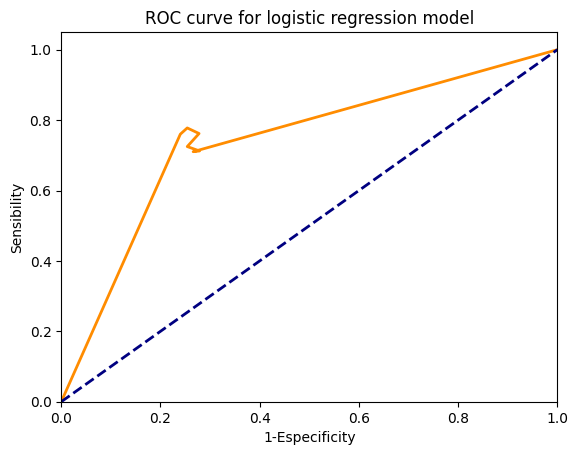

In [18]:
# initial variables
test_percentages = [0.1, 0.25, 0.50, 0.75, 0.9, 1]
y_tests = []
y_preds = []
accurancies = []
precisions = []
recalls = []
num_rows = min(X0_test.shape[0], X1_test.shape[0])

# Get the bes model hyperparameters
model = OurLogisticRegression()
param_grid = {'lr': [0.001, 0.05, 0.01],
              'num_iter': [100, 1000, 10000]}
grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# Instantiate model with the best hyperparameters
model = OurLogisticRegression(lr=0.001, num_iter=100)
model.fit(X_train, y_train)

# get testing metrics by using different amount of tests
for test_percentage in test_percentages:

    # get the amount of data needed for each percentage
    n_tests = int(num_rows * test_percentage)
    X0_test_i = X0_test.iloc[:n_tests, :]
    X1_test_i = X1_test.iloc[:n_tests, :]
    y0_test_i = y0_test.iloc[:n_tests]
    y1_test_i = y1_test.iloc[:n_tests]

    X_test_i = pd.concat([X0_test_i, X1_test_i], axis= 0)
    y_test_i = pd.concat([y0_test_i, y1_test_i], axis= 0)
    y_tests.append(y_test_i)

    # predict probabilities for test set
    probs = model.predict_prob(X_test_i)

    # predict classes for test set
    y_pred_i = model.predict(X_test_i, 0.5)
    y_preds.append(y_pred_i)

    # get the metrics
    accurancies.append(model.accurancy(y_pred_i, y_test_i))
    precisions.append(model.precision(y_pred_i, y_test_i))
    recalls.append(model.recall(y_pred_i, y_test_i))

# draw ROC curve
fpr = np.array([0., 1.])
tpr = np.array([0., 1.])
aucs = []
for i in range(len(test_percentages)):
    fpr_i, tpr_i, auc_i = model.auc(y_preds[i], y_tests[i])
    fpr = np.insert(fpr, -1, fpr_i[1])
    tpr = np.insert(tpr, -1, tpr_i[1])
    aucs.append(auc_i)

# display test metric results
title_row = ['Amount of tests', 'Accurancy', 'Precision', 'Recall', 'Auc']
df_results = pd.DataFrame(columns=title_row)

for i, test_percentage in enumerate(test_percentages):
    row = [int(test_percentage*num_rows), accurancies[i], precisions[i], recalls[i], aucs[i]]
    df_results.loc[len(df_results)] = row

print(df_results)
model.plot_roc(fpr, tpr)

* Set de datos de notas del curso de Arquitectura de Computadores I

In [19]:
# feature engineering 
# prueba con los diferentes algoritmos
# comparación de los resultados

* Set de datos a elegir

In [20]:
# feature engineering 
# prueba con los diferentes algoritmos
# comparación de los resultados

### Puntos extra: modelo que precide la nota del estudiante (utilizando el set de datos de Arquitectura de Computadores I)

La predicción está basada en las notas del proyecto 1, proyecto 2, examen 1 y taller 1.